Challenge 1 - The stats Submodule
This submodule contains statistical functions for conducting hypothesis tests, producing various distributions and other useful tools. Let's examine this submodule using the KickStarter dataset. We will load the dataset below.

In [2]:
import pandas as pd
import numpy as np

In [3]:
kickstarter = pd.read_csv('ks-projects-201801.csv')


In [4]:
import scipy.stats

In [5]:
print(scipy.stats.mode(kickstarter['country']))
print(scipy.stats.mode(kickstarter['currency']))

ModeResult(mode=array(['US'], dtype=object), count=array([292627]))
ModeResult(mode=array(['USD'], dtype=object), count=array([295365]))


The trimmed mean is a function that computes the mean of the data with observations removed. The most common way to compute a trimmed mean is by specifying a percentage and then removing elements from both ends. However, we can also specify a threshold on both ends. The goal of this function is to create a more robust method of computing the mean that is less influenced by outliers. SciPy contains a function called tmean for computing the trimmed mean.

In the cell below, import the tmean function and then find the 75th percentile of the goal column. Compute the trimmed mean between 0 and the 75th percentile of the column. Read more about the tmean function here.

In [6]:
scipy.stats.tmean(kickstarter['goal'],limits=(kickstarter['goal'].quantile(0.0),kickstarter['goal'].quantile(0.75)))

4874.150287106898

In [7]:
kickstarter['goal'].mean()

49080.79152056854

SciPy contains various statistical tests. One of the tests is Fisher's exact test. This test is used for contingency tables.
The test originates from the "Lady Tasting Tea" experiment. In 1935, Fisher published the results of the experiment in his book. The experiment was based on a claim by Muriel Bristol that she can taste whether tea or milk was first poured into the cup. Fisher devised this test to disprove her claim. The null hypothesis is that the treatments do not affect outcomes, while the alternative hypothesis is that the treatment does affect outcome. To read more about Fisher's exact test, click here.

Let's perform Fisher's exact test on our KickStarter data. We intend to test the hypothesis that the choice of currency has an impact on meeting the pledge goal. We'll start by creating two derived columns in our dataframe. The first will contain 1 if the amount of money in usd_pledged_real is greater than the amount of money in usd_goal_real. We can compute this by using the np.where function. If the amount in one column is greater than the other, enter a value of 1, otherwise enter a value of zero. Add this column to the dataframe and name it goal_met.

In [5]:
kickstarter['goal_met'] = np.where(kickstarter['usd_pledged_real'] > kickstarter['usd_goal_real'], 1, 0)
kickstarter.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,goal_met
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95,0
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00,0
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00,0
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00,0
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00,0


Next, create a column that checks whether the currency of the project is in US Dollars. Create a column called usd using the np.where function where if the currency is US Dollars, assign a value of 1 to the row and 0 otherwise.

In [6]:
kickstarter['usd'] = np.where(kickstarter['currency'] == 'USD', 1, 0)
kickstarter.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,goal_met,usd
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95,0,0
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00,0,1
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00,0,1
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00,0,1
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00,0,1


Now create a contingency table using the pd.crosstab function in the cell below to compare the goal_met and usd columns.

Import the fisher_exact function from scipy.stats and conduct the hypothesis test on the contingency table that you have generated above. You can read more about the fisher_exact function here. The output of the function should be the odds ratio and the p-value. The p-value will provide you with the outcome of the test.

In [7]:
from scipy.stats import fisher_exact

cont_table = pd.crosstab(index=kickstarter['goal_met'], columns=kickstarter['usd'])

odd_ratio, p_value = scipy.stats.fisher_exact(cont_table)

In [8]:
cont_table

usd,0,1
goal_met,,
0,58685,187130
1,24611,108235


In [9]:
p_value

9.78e-321

In [10]:
odd_ratio

1.3791838163150314

## Challenge 2 - The linalg submodule
This submodule allows us to perform various linear algebra calculations.

Using the solve function, find the solution of the equation system 5x + 2y = 3 and 3x + y = 2 in the cell below.

In [11]:
from scipy import linalg

eq = [[5, 2], [3, 1]]
res = [3, 2]

linalg.solve(eq, res)

array([ 1., -1.])

## Challenge 3 - The interpolate submodule
This submodule allows us to interpolate between two points and create a continuous distribution based on the observed data.

In the cell below, import the interp1d function and first take a sample of 10 rows from kickstarter.

In [12]:
from scipy.interpolate import interp1d

sample_k = kickstarter.sample(n = 10).reset_index()
sample_k

,index,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,goal_met,usd
0,255772,370602225,Ben Cipolla Band: Record & Release Debut Album,Jazz,Music,GBP,2016-01-05,1500.0,2015-11-06 22:08:37,1592.0,successful,30,GB,2449.20,2320.29,2186.21,1,0
1,215343,2097161040,Unfolding Quite Wonderfully,Publishing,Publishing,USD,2015-11-16,14000.0,2015-10-17 00:23:26,2137.0,failed,35,US,2137.00,2137.00,14000.00,0,1
2,275492,471732151,Yaupon Asi Tea Company,Food,Food,USD,2012-03-04,35000.0,2012-02-03 16:31:44,65.0,failed,4,US,65.00,65.00,35000.00,0,1
3,17212,1087402362,U. S. Sniper (Canceled),Music Videos,Film & Video,USD,2015-06-28,1500.0,2015-05-29 03:52:18,0.0,canceled,0,US,0.00,0.00,1500.00,0,1
4,270859,448140496,Cuffs - The New Way To Roll Your Jeans,Accessories,Fashion,USD,2016-04-24,15000.0,2016-03-25 17:52:05,116.0,failed,2,US,116.00,116.00,15000.00,0,1
5,13060,1065557019,"Waveform - bleep, techno and rave silkscreen p...",Graphic Design,Design,GBP,2013-10-31,800.0,2013-10-01 14:17:21,5640.0,successful,158,GB,9108.47,8999.66,1276.55,1,0
6,366280,936248513,Last 2 standing,Tabletop Games,Games,USD,2016-06-11,7500.0,2016-05-02 21:48:24,43.0,failed,1,US,43.00,43.00,7500.00,0,1
7,183710,1935281459,The Veil - Short Film,Shorts,Film & Video,USD,2013-02-01,5000.0,2012-12-03 19:12:30,747.0,failed,17,US,747.00,747.00,5000.00,0,1
8,38405,1194925739,Cincinnati LAN party cafe,Technology,Technology,USD,2015-11-25,20000.0,2015-09-26 17:05:44,310.0,failed,3,US,310.00,310.00,20000.00,0,1
9,292356,557811162,Skylake-X/X299 macOS 10.12/10.13 Desktop Guide...,Software,Technology,EUR,2017-10-07,4000.0,2017-09-23 00:47:07,30.0,failed,3,DE,0.00,35.43,4724.00,0,0


Next, create a linear interpolation of the backers as a function of usd_pledged_real. Create a function f that generates a linear interpolation of backers as predicted by the amount of real pledged dollars.

In [14]:
f = interp1d(sample_k['usd_pledged_real'], sample_k['backers'], kind='linear')
f;

Now create a new variable called x_new. This variable will contain all integers between the minimum number of backers in our sample and the maximum number of backers. The goal here is to take the dataset that contains few obeservations due to sampling and fill all observations with a value using the interpolation function.

Hint: one option is the np.arange function.

In [15]:
x_new = np.arange(sample_k['backers'].min(), sample_k['backers'].max())
x_new 

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157])

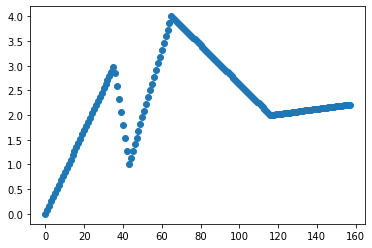

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(x_new, f(x_new), 'o')

Next create a function that will generate a cubic interpolation function. Name the function g



In [17]:
x = np.unique(sample_k['usd_pledged_real'],return_index=True)[0]
y = sample_k['backers'][np.unique(sample_k['usd_pledged_real'],return_index=True)[1]]


In [18]:
g = interp1d(x, y, kind='cubic')
g

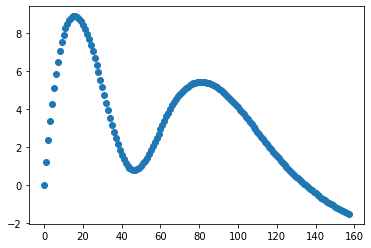

In [19]:
# Run this code:

plt.plot(x_new, g(x_new), 'o')

## Bonus Challenge - The Binomial Distribution
The binomial distribution allows us to calculate the probability of k successes in n trials for a random variable with two possible outcomes (which we typically label success and failure).

The probability of success is typically denoted by p and the probability of failure is denoted by 1-p.

The scipy.stats submodule contains a binom function for computing the probabilites of a random variable with the binomial distribution. You may read more about the binomial distribution here and about the binom function here.

In the cell below, compute the probability that a dice lands on 5 exactly 3 times in 8 tries.

Hint: the probability of rolling a 5 is 1/6.

In [21]:
from scipy.stats import binom

In [22]:
binom.pmf(3, 8, (1/6))*100

10.419048163389725